# Initial Data Exploration and Baseline Model

&copy; Sifiso Rimana | May 9, 2025 | Financial Inclusion - Zindi Competetion

----

# 1. Initial Exploration

---

In [1]:
import pandas as pd
import arviz as az
import numpy as np
from matplotlib import pyplot as plt

from IPython.core.pylabtools import figsize
plt.style.use('arviz-darkgrid')
# figsize(, 7)

In [2]:
df = pd.read_csv('../data/Train.csv', index_col="uniqueid")
df.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
uniqueid,,,,,,,,,,,,
uniqueid_1,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
uniqueid_2,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
uniqueid_3,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
uniqueid_4,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
uniqueid_5,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
N = len(df)
Y = df['bank_account']
X = df.drop('bank_account', axis=1)

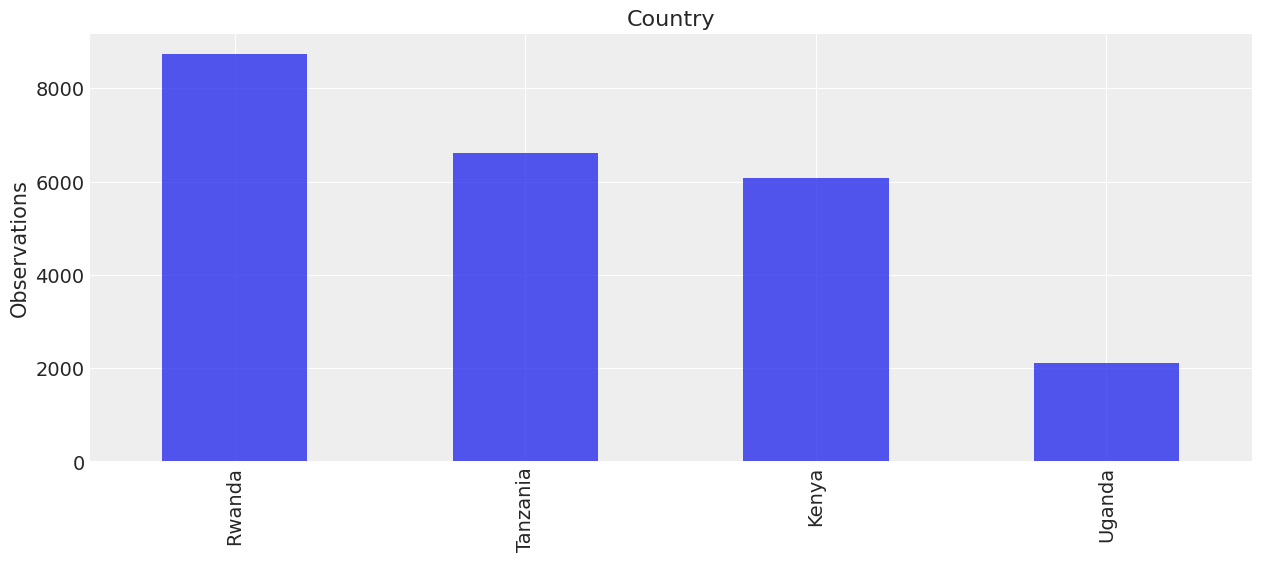

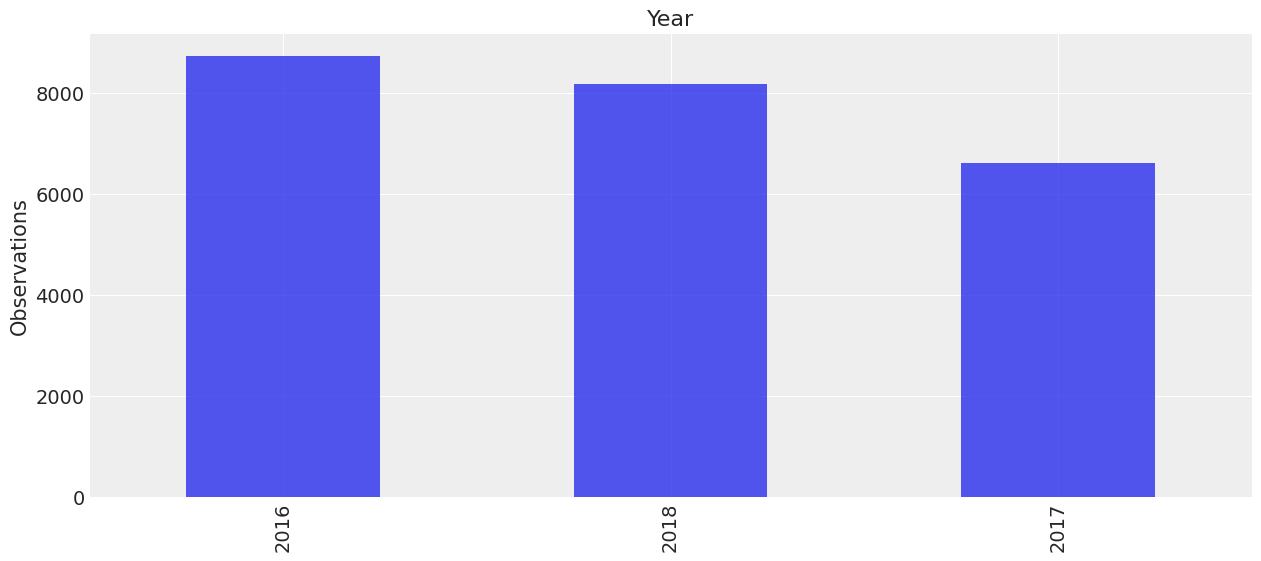

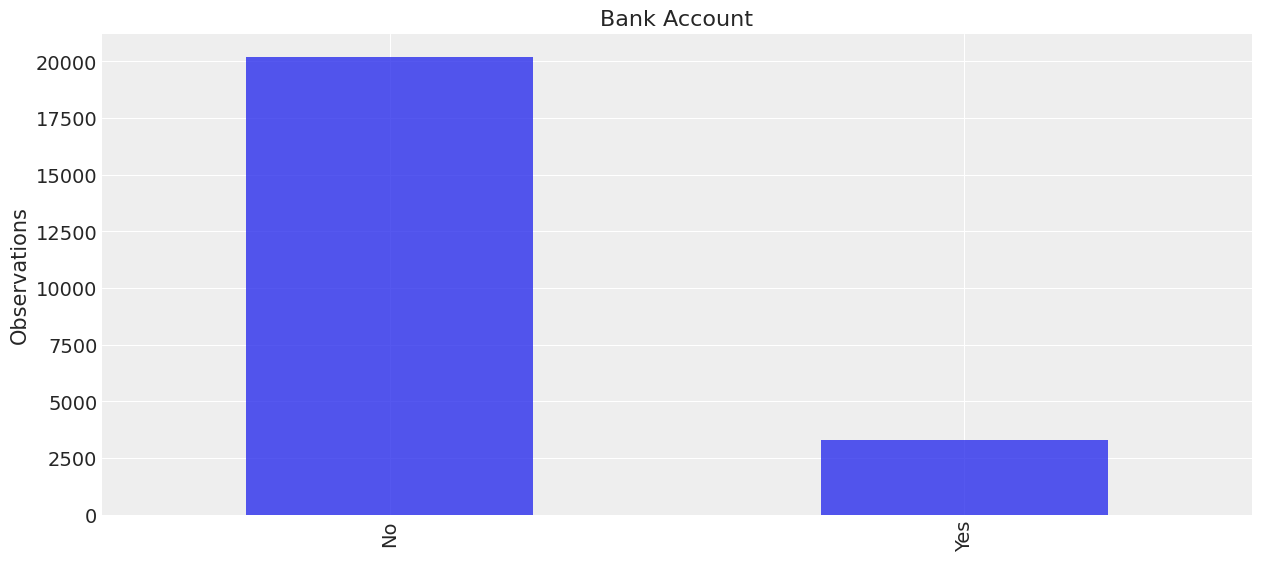

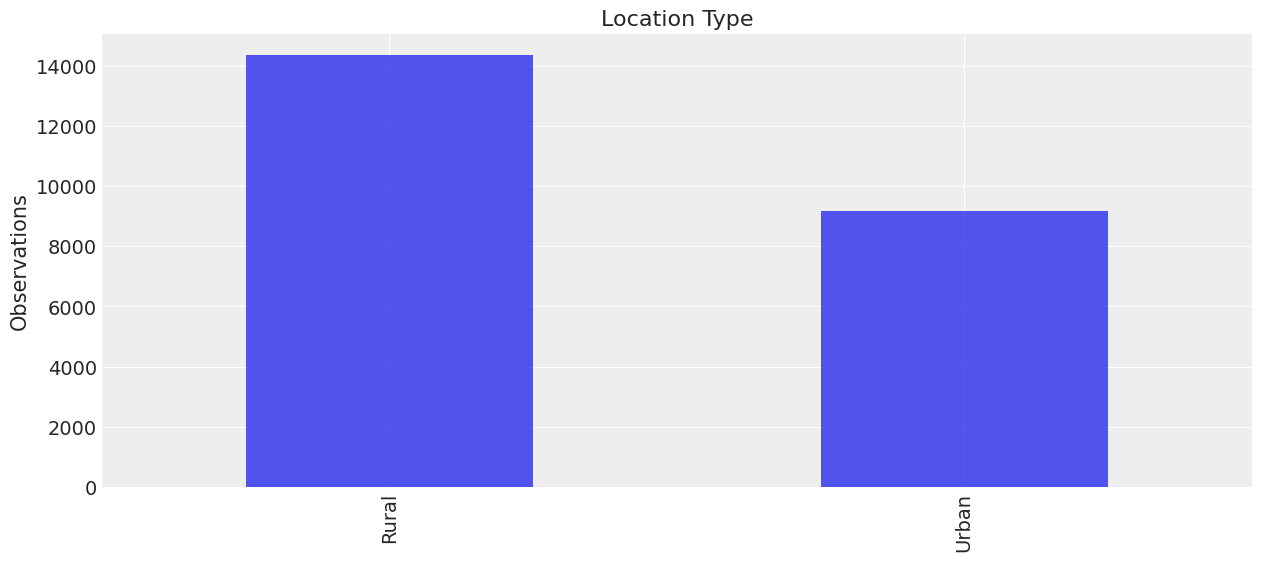

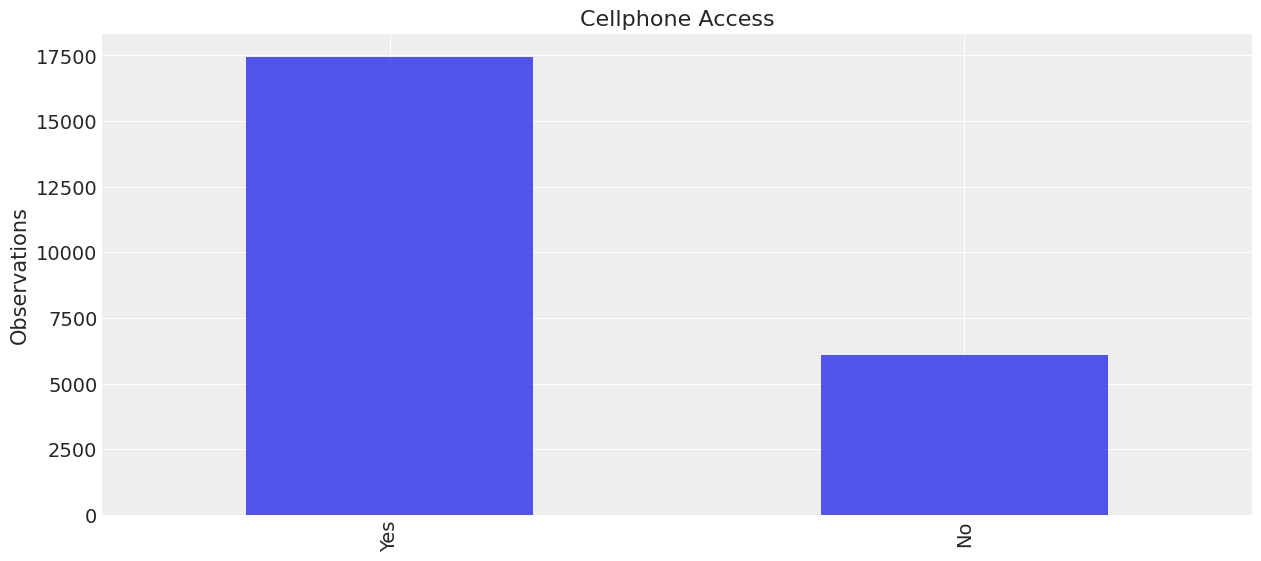

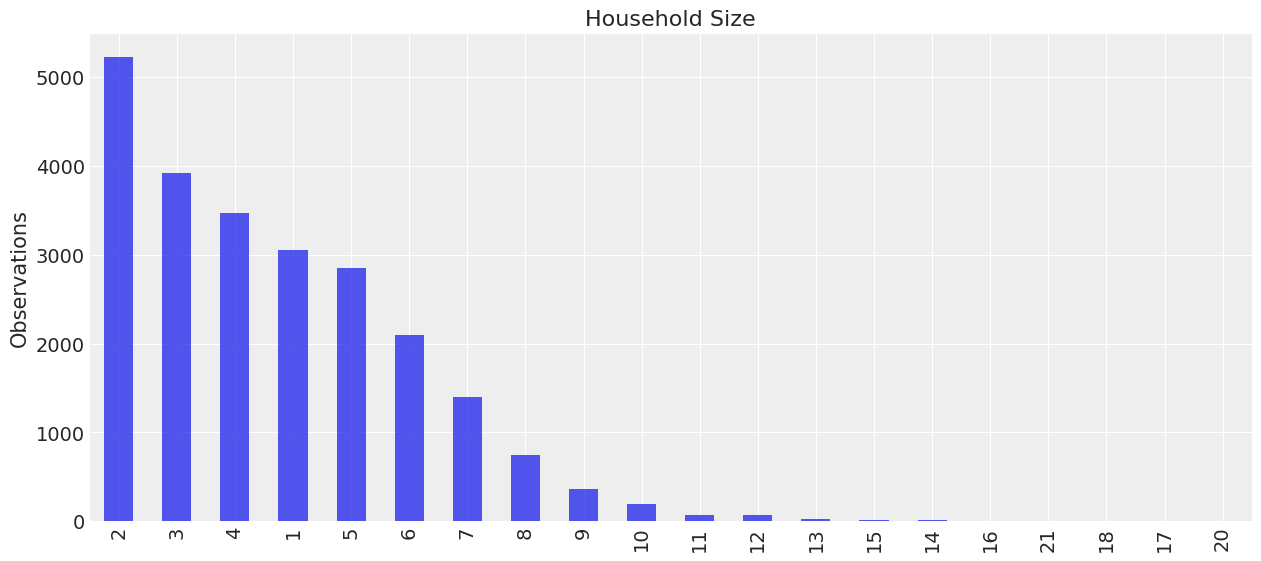

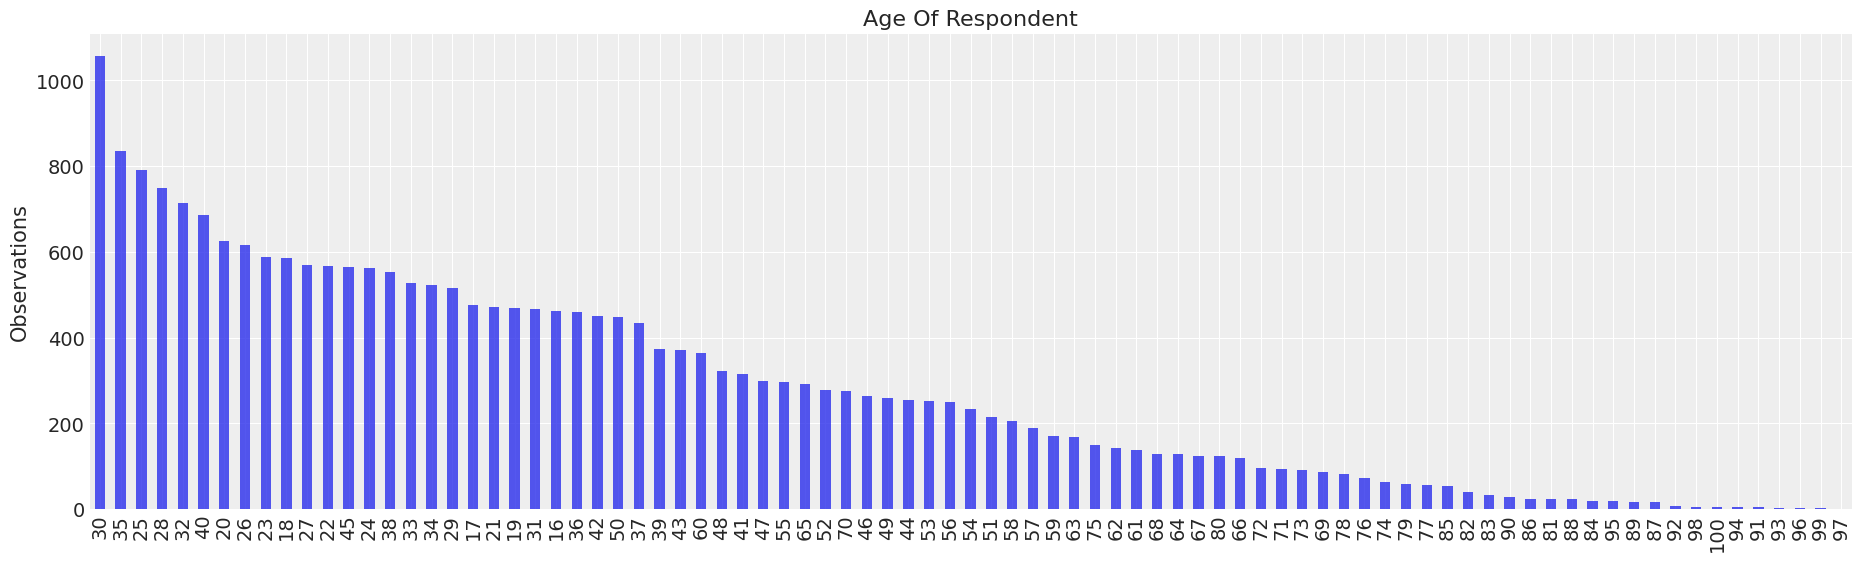

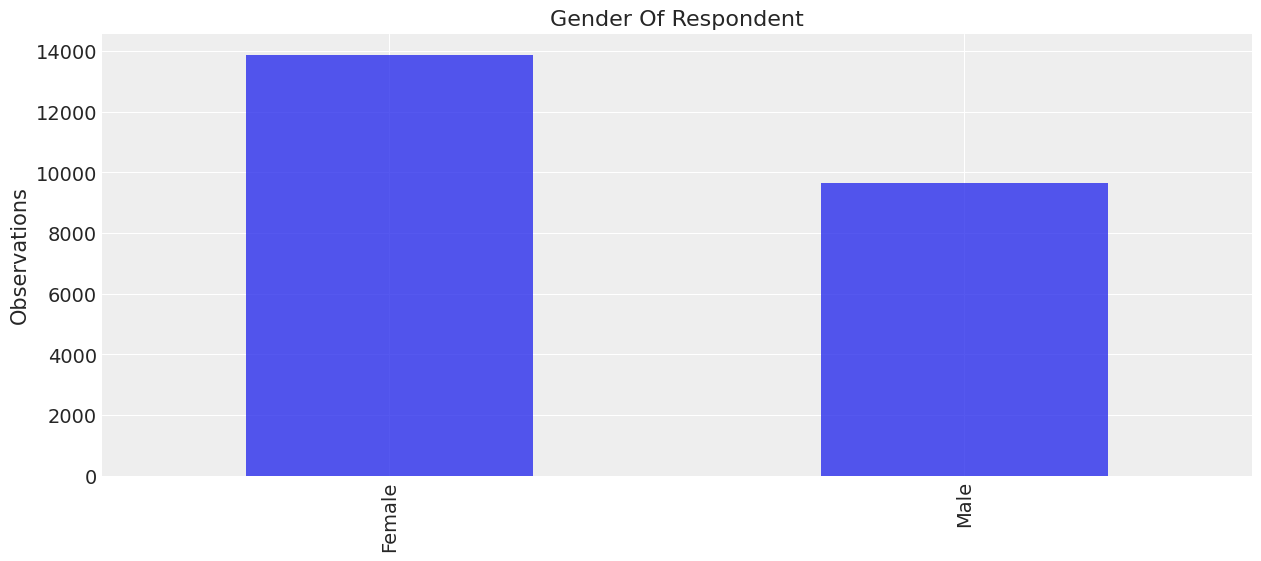

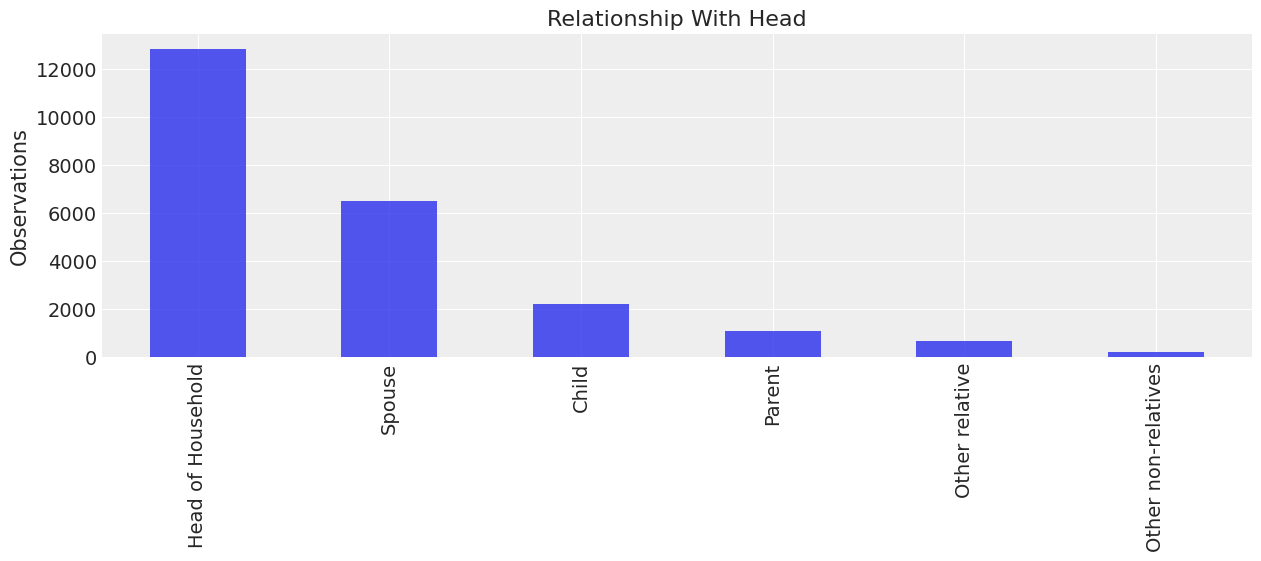

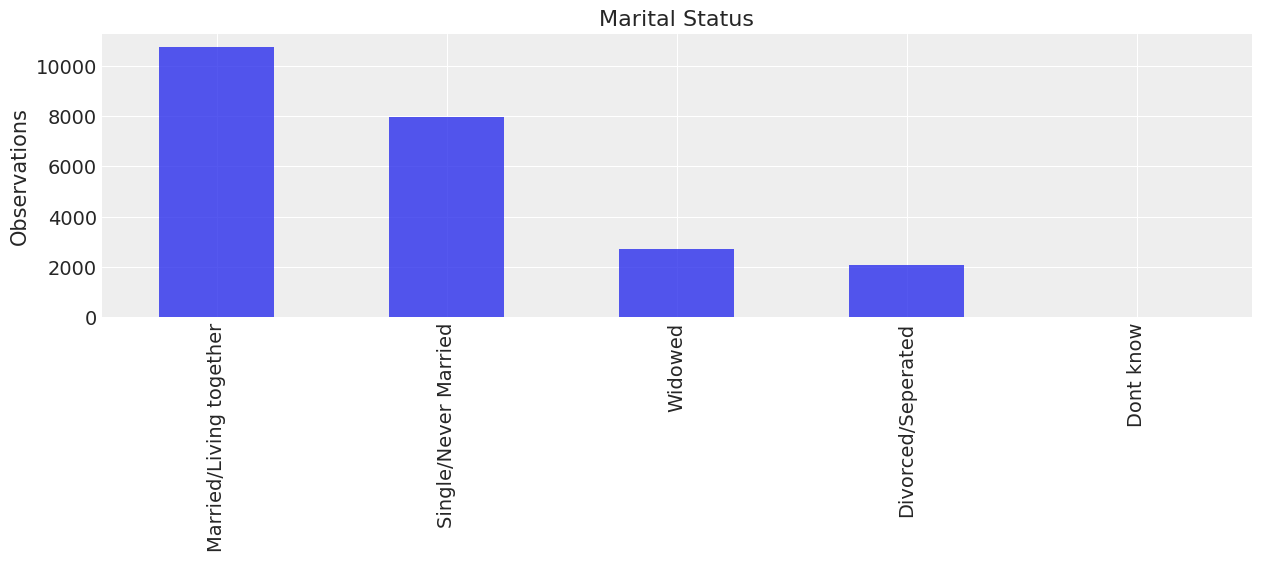

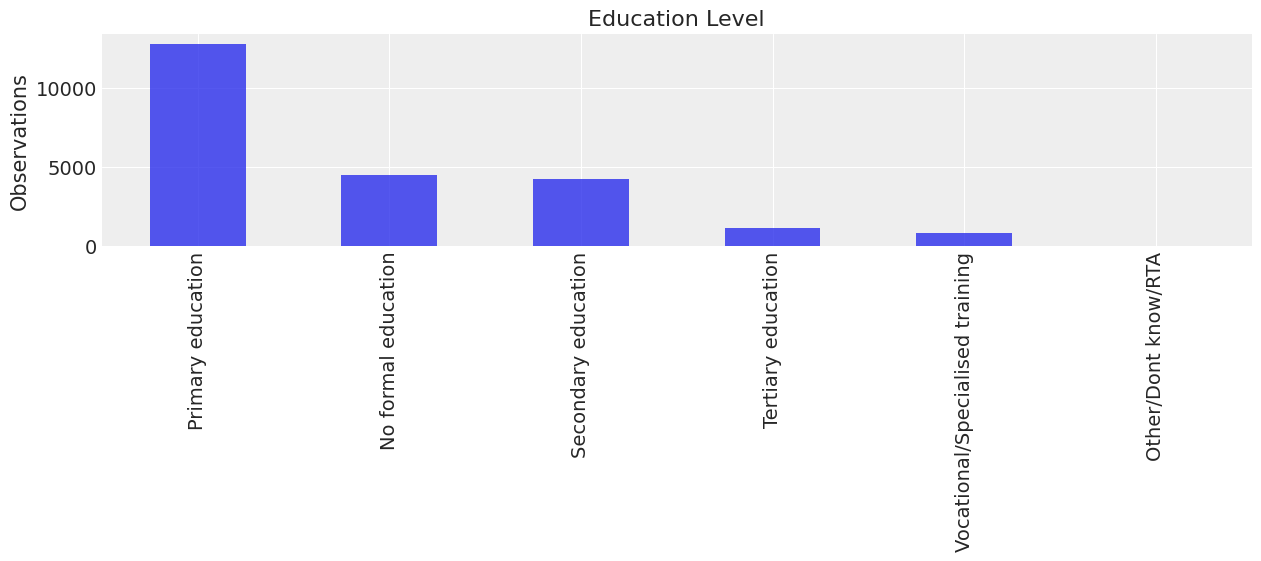

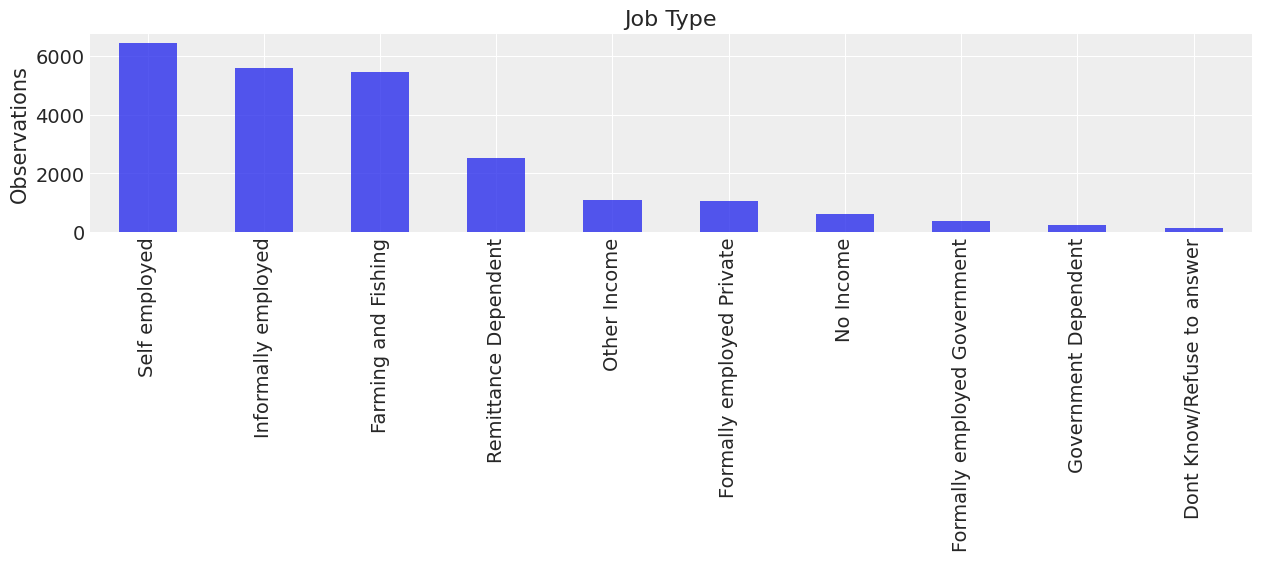

In [4]:
for col in df.columns:
    current_title = col.replace('_', ' ').title()
    # get the value_counts
    table = df[col].value_counts()
    if col == 'age_of_respondent':
        table.plot(kind='bar', alpha=0.8, figsize=(18.5, 5.5))
        # plt.xticks(rotation=45)
    else:
        table.plot(kind='bar', alpha=0.8, figsize=(12.5, 5.5))
    # plot the column bar plot
    plt.title(current_title)
    plt.xlabel(None)
    plt.ylabel("Observations")
    plt.show()
    

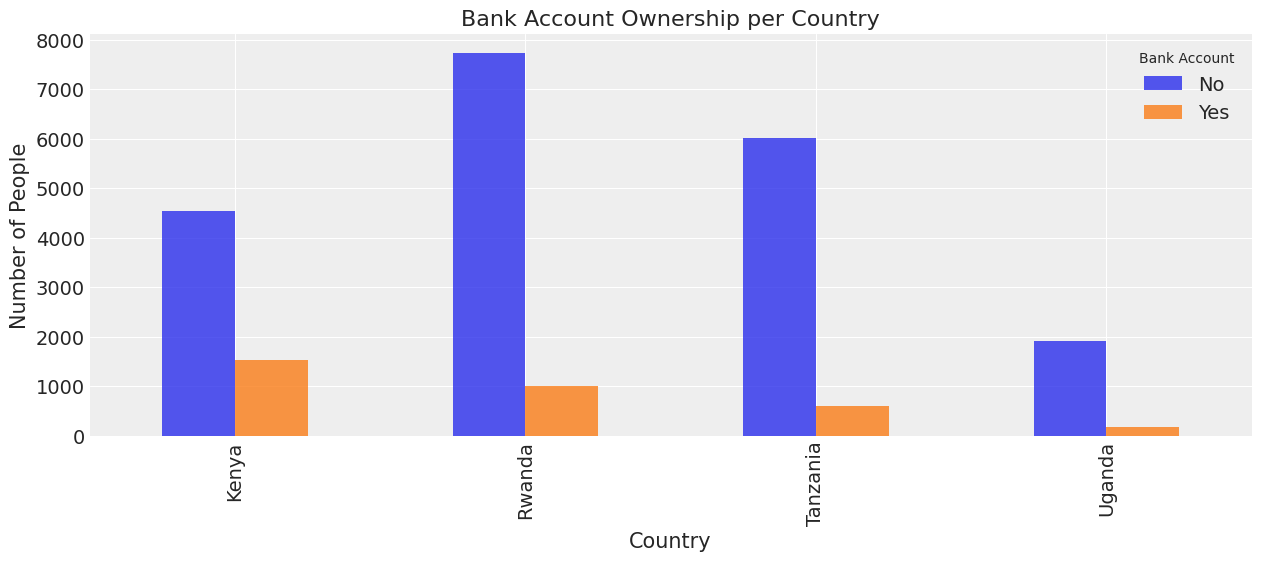

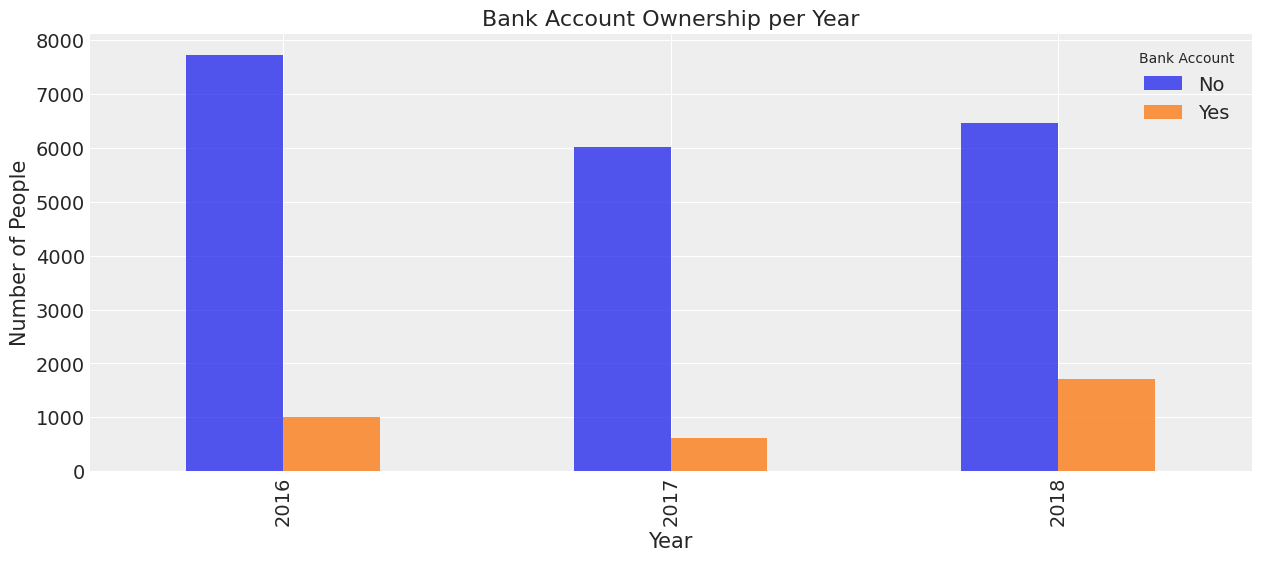

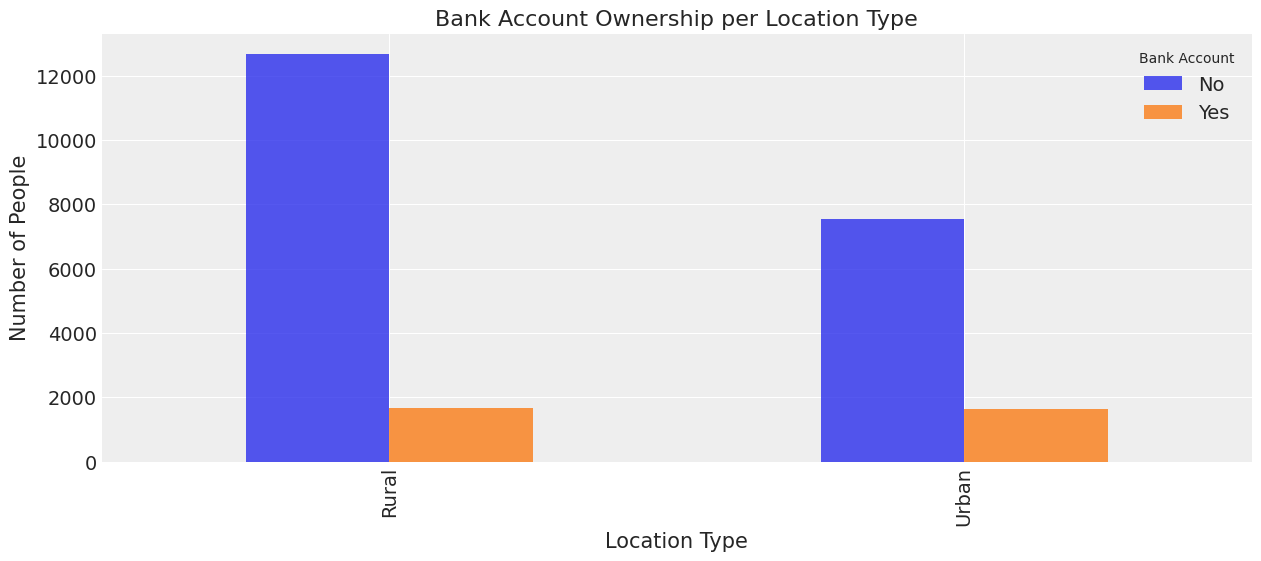

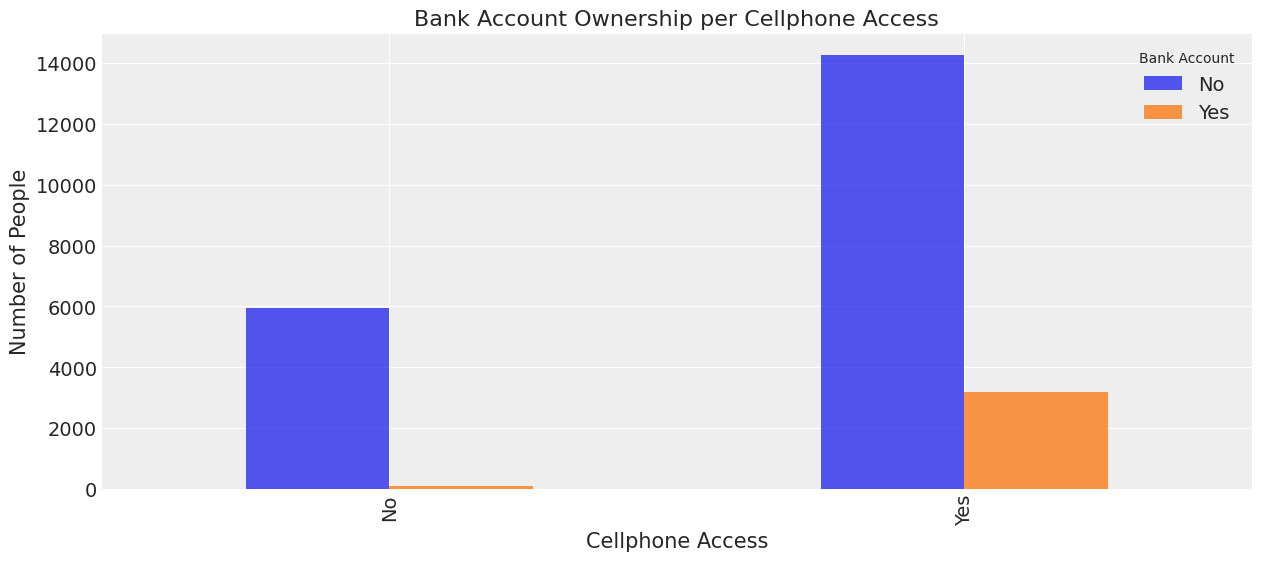

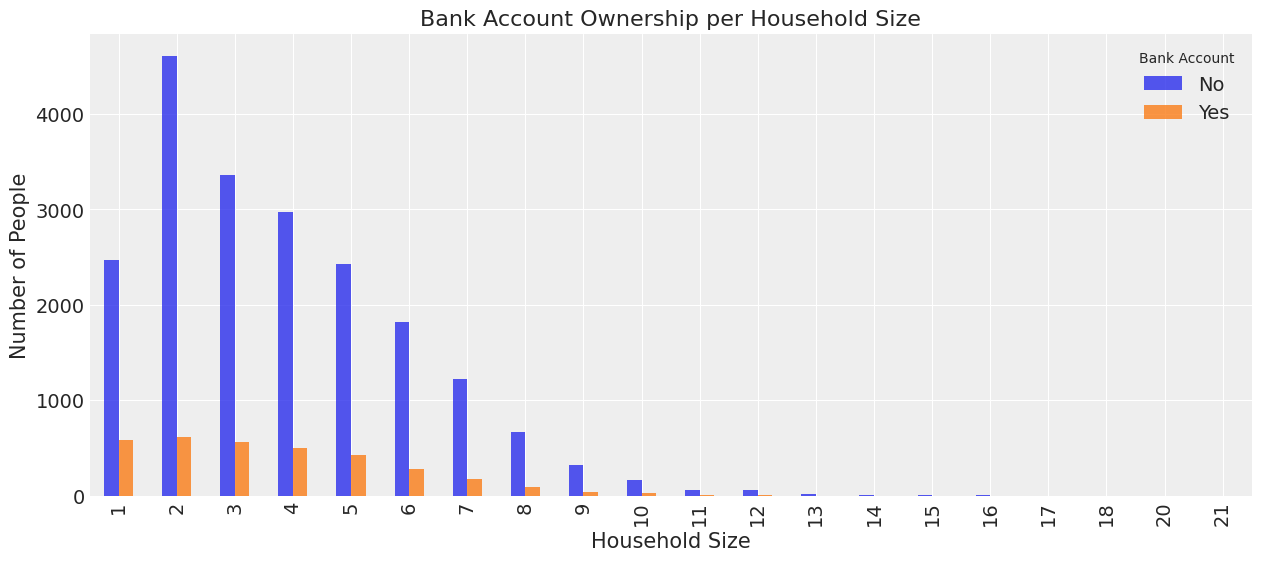

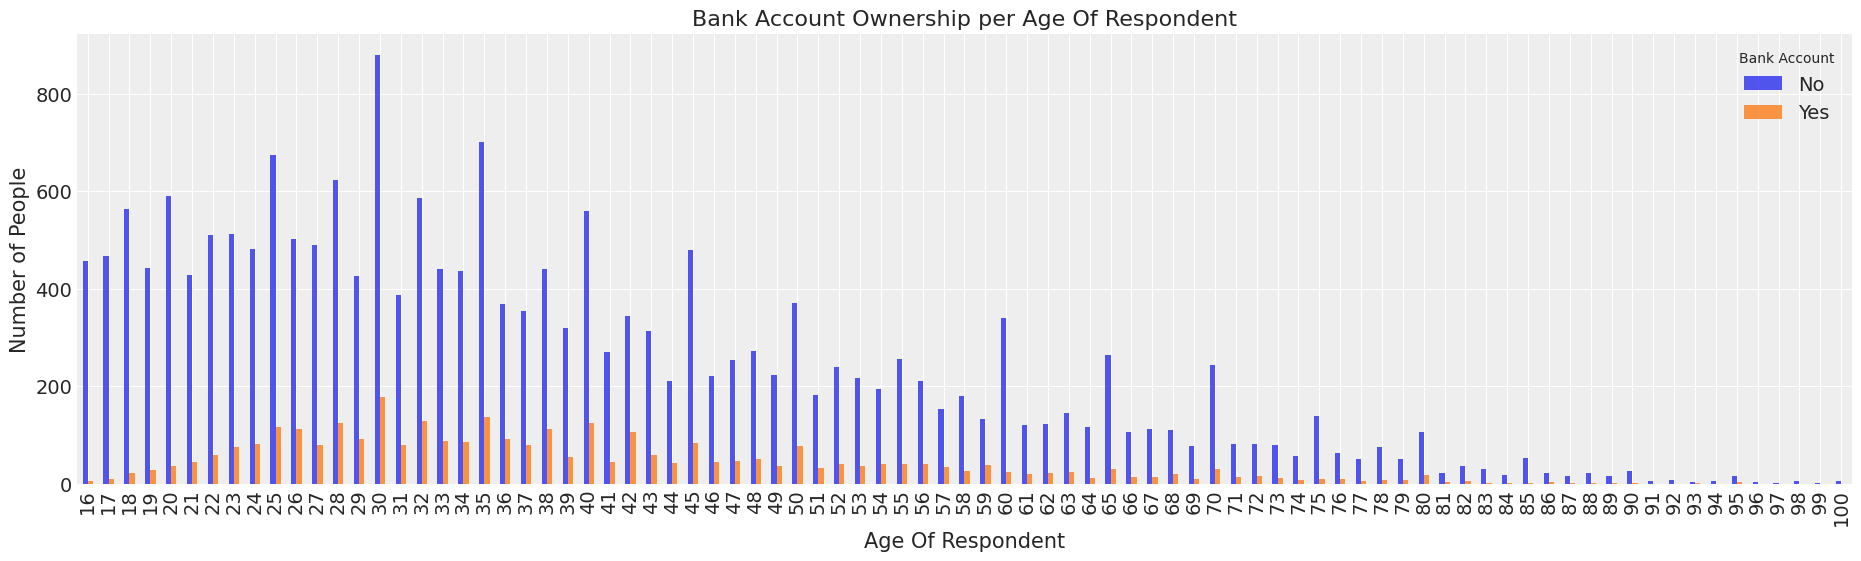

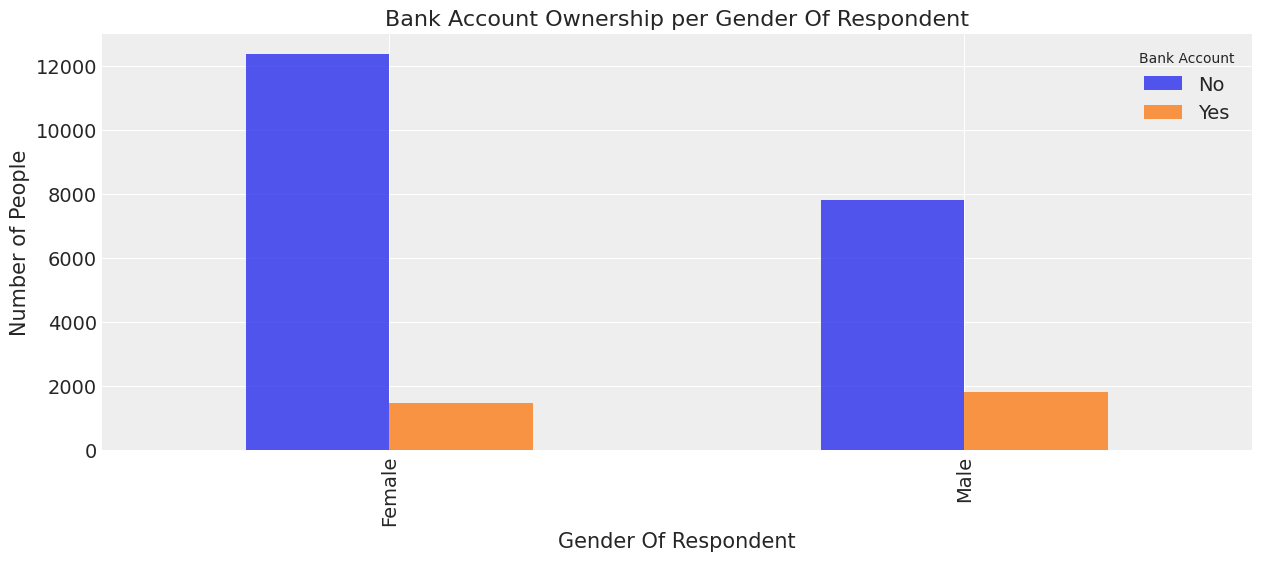

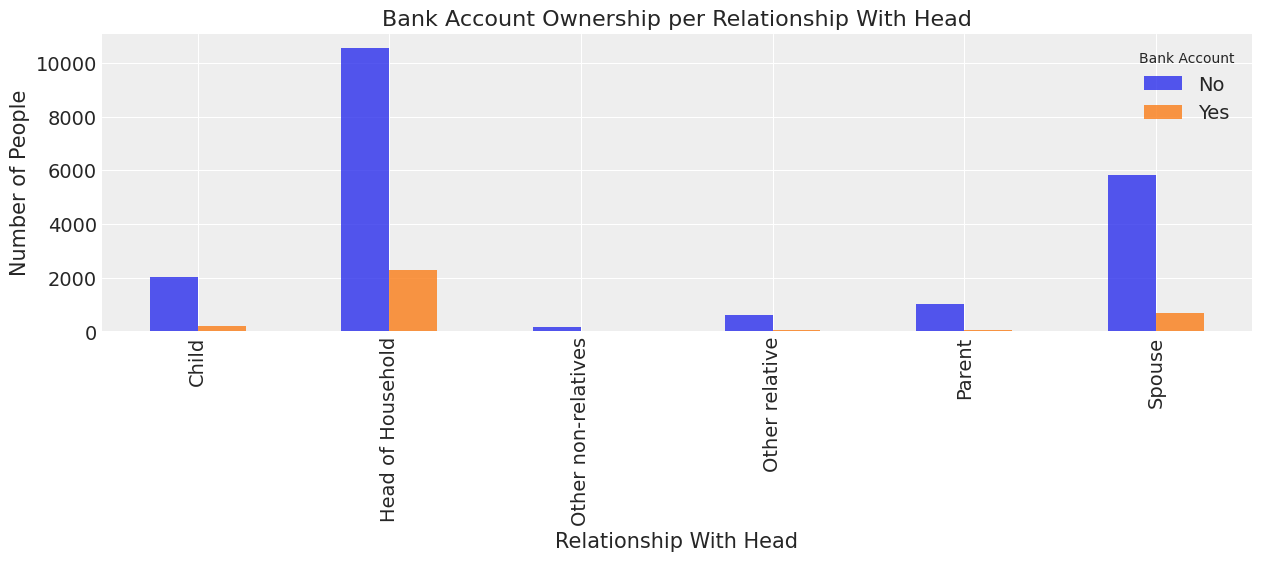

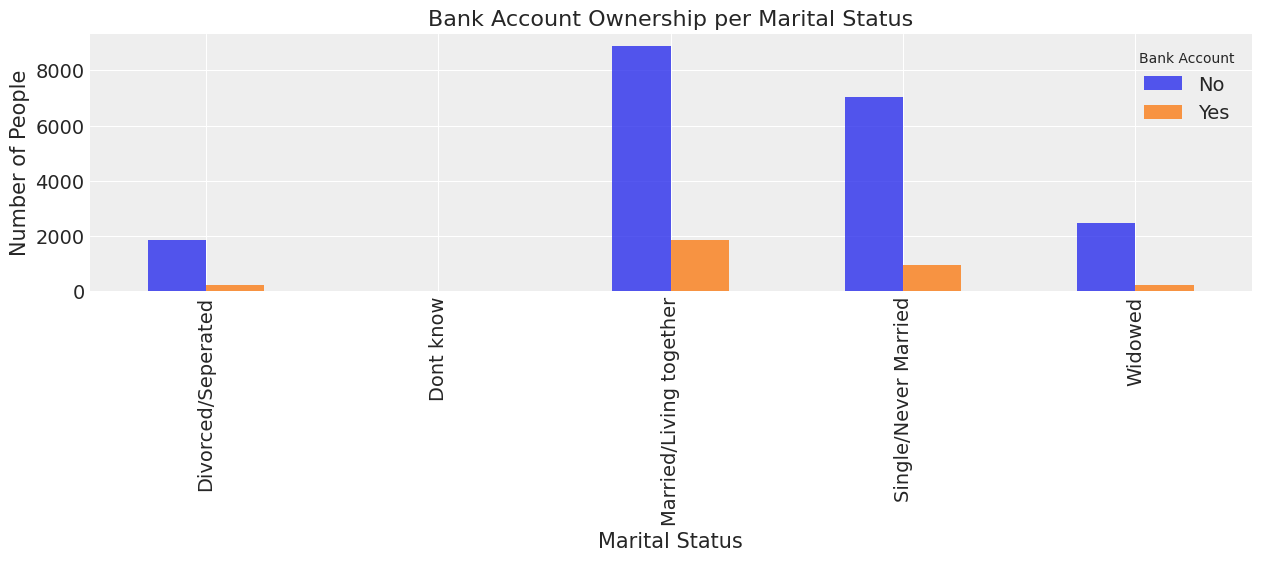

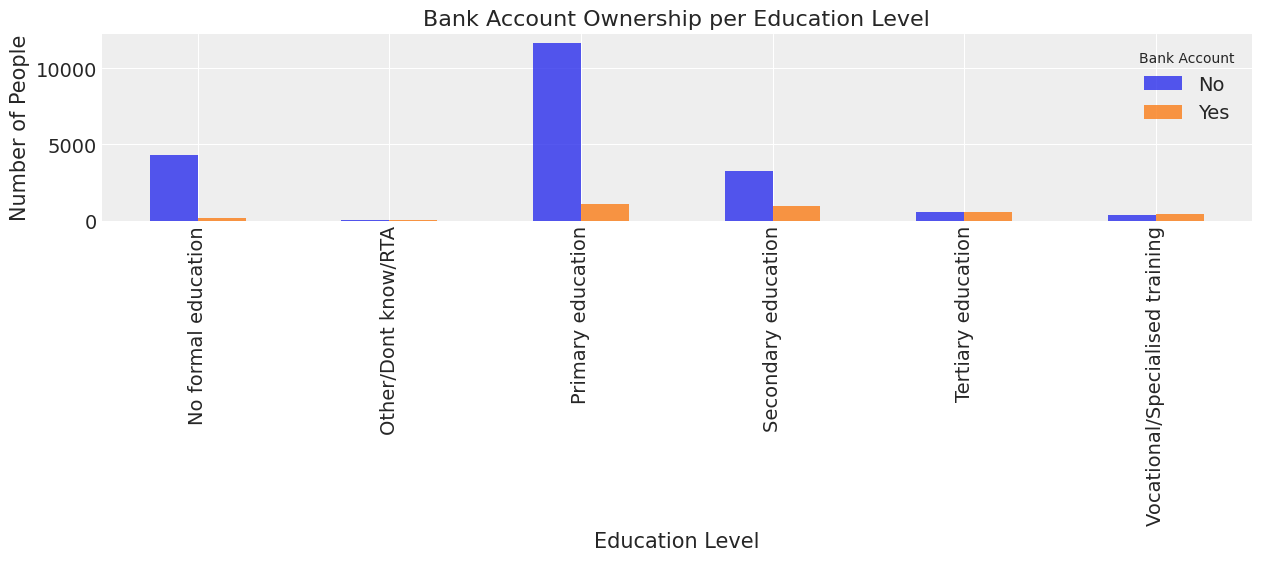

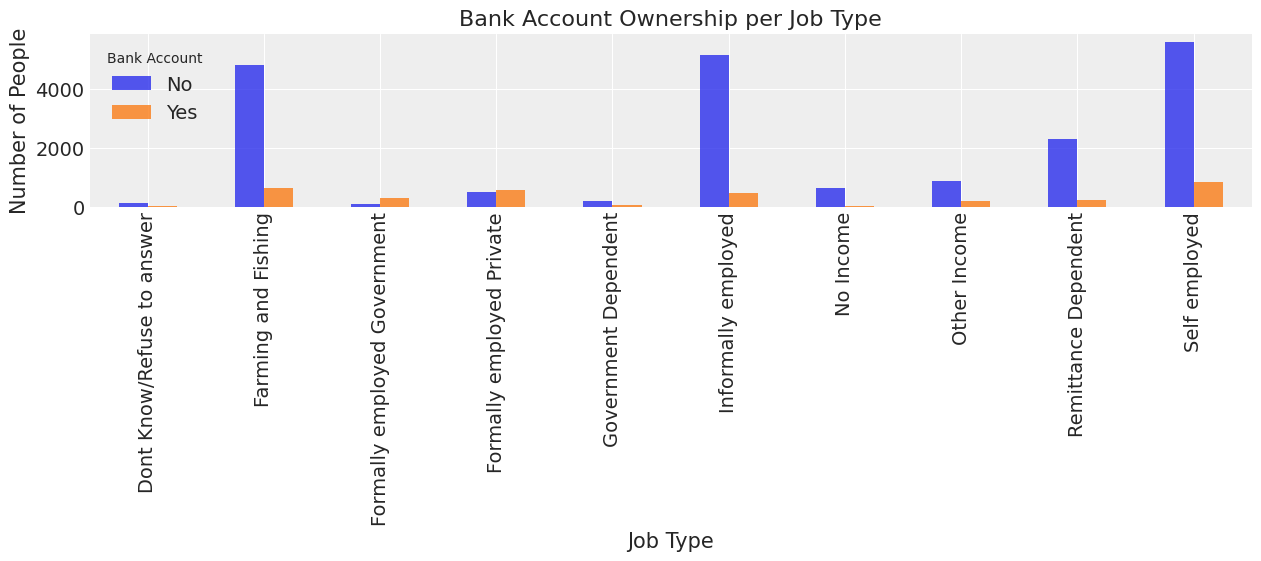

In [5]:
for col in df.columns:
    if col == 'bank_account': 
        continue
    grouped = df.groupby([col, 'bank_account']).size().unstack(fill_value=0)
    title = col.replace('_', ' ').title()
    if col == 'age_of_respondent':
        grouped.plot(kind='bar', alpha=0.8, figsize=(18.5, 5.5))
        # plt.xticks(rotation=45)
    else:
        grouped.plot(kind='bar', alpha=0.8, figsize=(12.5, 5.5))
    plt.title(f'Bank Account Ownership per {title}')
    plt.ylabel('Number of People')
    plt.xlabel(title)
    
    plt.legend(title='Bank Account')
    # plt.tight_layout()
    plt.show()

# 2. Baseline Model
--- 

In [6]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

y_encoder = LabelEncoder()


In [7]:
# transform the age_of_respondent column

age_bins = [0, 20, 25, 30, 50, 60, 100]
age_labels = ['<20', '20-25', '26-30', '31-50', '51-60', '60+']

# df['age_of_respondent'].apply


df['age_group'] = pd.cut(df['age_of_respondent'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

In [8]:
df[['age_of_respondent', 'age_group']]

,age_of_respondent,age_group
uniqueid,,
uniqueid_1,24,20-25
uniqueid_2,70,60+
uniqueid_3,26,26-30
uniqueid_4,34,31-50
uniqueid_5,26,26-30
...,...,...
uniqueid_2113,48,31-50
uniqueid_2114,27,26-30
uniqueid_2115,27,26-30


<Axes: xlabel='age_group'>

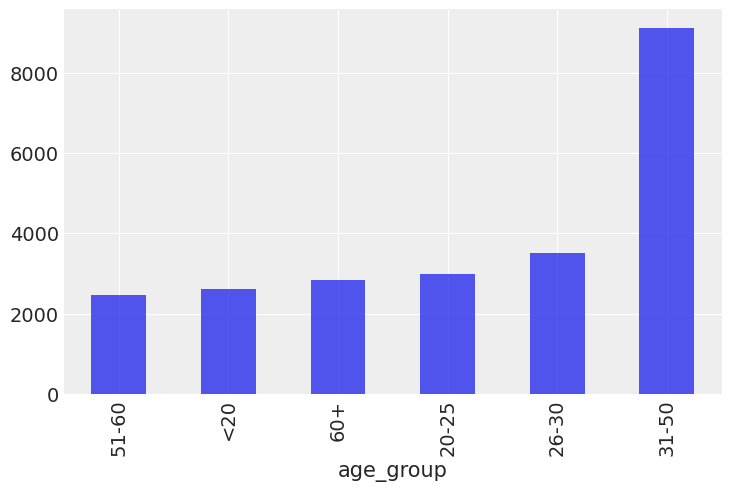

In [9]:
df['age_group'].value_counts(ascending=True).plot(kind='bar', alpha=0.8)

## Preprocessing


In [10]:
Y_encoded = y_encoder.fit_transform(Y)

In [11]:
df.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type', 'age_group'],
      dtype='object')

In [12]:
df['country'].value_counts().index.sort_values(ascending=True)

Index(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype='object', name='country')

In [13]:
education_order = ['No formal education', 'Other/Dont know/RTA', 'Primary education', 'Secondary education', 'Vocational/Specialised training', 'Tertiary education']

In [14]:
column_transformer = ColumnTransformer(
    [
        (
            'ordinal', 
            OrdinalEncoder(
                dtype=int, 
                categories=[
                    age_labels, 
                    df.year.value_counts().index.sort_values(ascending=True),
                    education_order
                    ]
                ), 
                ['age_group', 'year', 'education_level']
        ),
        ('categories', 
         OneHotEncoder(
            dtype=int, 
            categories=[
                df['country'].value_counts().index.values,
                df['gender_of_respondent'].value_counts().index.values,
                df['location_type'].value_counts().index.values,
                df['cellphone_access'].value_counts().index.values,
                df['relationship_with_head'].value_counts().index.values,
                df['marital_status'].value_counts().index.values,
                df['job_type'].value_counts().index.values,
                ]), 
                ['country', 'gender_of_respondent', 'location_type', 
                     'cellphone_access', 'relationship_with_head', 'marital_status', 'job_type'])
    ]
)



df.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type', 'age_group'],
      dtype='object')

## Building the baseline models

In [15]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [49]:
clf1 = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('logistic', LogisticRegression())
])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('bank_account', axis=1), Y_encoded, random_state=42, test_size=0.2)

In [51]:
clf1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['<20',
                                                                              '20-25',
                                                                              '26-30',
                                                                              '31-50',
                                                                              '51-60',
                                                                              '60+'],
                                                                             Index([2016, 2017, 2018], dtype='int64', name='year'),
                                                                             ['No '
                                                                              'formal '
                                                                              'education',
                                                                              'Other/Dont '
                                                                              'know/RTA',
                                                                              'Primary '
                                                                              'education',
                                                                              'Secondary '
                                                                              'education',
                                                                              'Vocational/Specialised '
                                                                              'training',
                                                                              'Tertiary '
                                                                              'education']],
                                                                 d...
                                                                            array(['Self employed', 'Informally employed', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Formally employed Private', 'No Income',
       'Formally employed Government', 'Government Dependent',
       'Dont Know/Refuse to answer'], dtype=object)],
                                                                dtype=<class 'int'>),
                                                  ['country',
                                                   'gender_of_respondent',
                                                   'location_type',
                                                   'cellphone_access',
                                                   'relationship_with_head',
                                                   'marital_status',
                                                   'job_type'])])),
                ('logistic', LogisticRegression())])

In [52]:
y_preds = clf1.predict(X_test)

In [53]:
y_preds[:10], y_test[:10]

(array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1]))

In [45]:
from sklearn.metrics import log_loss, f1_score, mean_absolute_error

In [54]:
log_loss(y_test, y_pred=y_preds)

4.083159884463218

In [55]:
f1_score(y_true=y_test, y_pred=y_preds)

0.440713536201469

In [56]:
mean_absolute_error(y_true=y_test, y_pred=y_preds)

0.1132837407013815

# 3. Prepare to submit baseline model
---

In [25]:
education_order = ['No formal education', 'Other/Dont know/RTA', 'Primary education', 'Secondary education', 'Vocational/Specialised training', 'Tertiary education']

# transform the age_of_respondent column

age_bins = [0, 20, 25, 30, 50, 60, 100]
age_labels = ['<20', '20-25', '26-30', '31-50', '51-60', '60+']


df['age_group'] = pd.cut(df['age_of_respondent'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

In [27]:
df_test = pd.read_csv('../data/Test.csv', index_col='uniqueid')
df_test.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
uniqueid,,,,,,,,,,,
uniqueid_6056,Kenya,2018,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
uniqueid_6060,Kenya,2018,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
uniqueid_6065,Kenya,2018,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
uniqueid_6072,Kenya,2018,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
uniqueid_6073,Kenya,2018,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [28]:
df_test['age_group'] = pd.cut(df_test['age_of_respondent'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

In [31]:
# predict!

df_test['bank_account'] = clf1.predict(df_test)

In [32]:
df_test

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_group,bank_account
uniqueid,,,,,,,,,,,,,
uniqueid_6056,Kenya,2018,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,26-30,1
uniqueid_6060,Kenya,2018,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,51-60,1
uniqueid_6065,Kenya,2018,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,60+,0
uniqueid_6072,Kenya,2018,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,31-50,0
uniqueid_6073,Kenya,2018,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,<20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
uniqueid_2998,Uganda,2018,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed,60+,0
uniqueid_2999,Uganda,2018,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed,31-50,0
uniqueid_3000,Uganda,2018,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income,31-50,0


In [33]:
df_test[['country', 'bank_account']]

,country,bank_account
uniqueid,,
uniqueid_6056,Kenya,1
uniqueid_6060,Kenya,1
uniqueid_6065,Kenya,0
uniqueid_6072,Kenya,0
uniqueid_6073,Kenya,0
...,...,...
uniqueid_2998,Uganda,0
uniqueid_2999,Uganda,0
uniqueid_3000,Uganda,0


In [34]:
submission = df_test[['country', 'bank_account']]

In [40]:
submission['unique_id'] = submission.index + ' x ' + submission['country']
submission[['unique_id', 'bank_account']].to_csv('../submissions/submission_01.csv', index=False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14196\74299345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['unique_id'] = submission.index + ' x ' + submission['country']
